In [1]:
import numpy as np
import sklearn.datasets
import umap
import umap.plot
import umap.utils as utils
import umap.aligned_umap
import matplotlib.pyplot as plt


/home/yifan/miniconda3/envs/deepdebugger/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-09-26 14:40:27.993993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 14:40:28.562862: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-09-26 14:40:28.562909: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinf

In [2]:
digits = sklearn.datasets.load_digits()

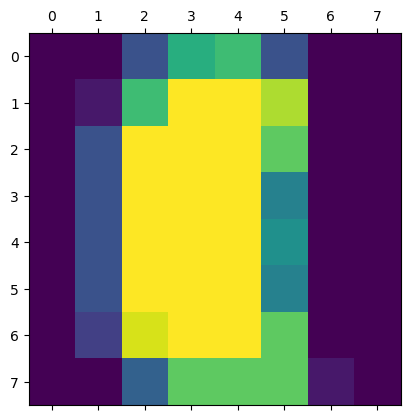

In [3]:
ordered_digits = digits.data[np.argsort(digits.data.sum(axis=1))]
ordered_target = digits.target[np.argsort(digits.data.sum(axis=1))]
plt.matshow(ordered_digits[-1].reshape((8,8)))

In [4]:
slices = [ordered_digits[150 * i:min(ordered_digits.shape[0], 150 * i + 400)] for i in range(10)]

In [5]:
relation_dict = {i+150:i for i in range(400-150)}
relation_dicts = [relation_dict.copy() for i in range(len(slices) - 1)]

In [6]:
aligned_mapper = umap.AlignedUMAP().fit(slices, relations=relation_dicts)

In [7]:
def axis_bounds(embedding):
    left, right = embedding.T[0].min(), embedding.T[0].max()
    bottom, top = embedding.T[1].min(), embedding.T[1].max()
    adj_h, adj_v = (right - left) * 0.1, (top - bottom) * 0.1
    return [left - adj_h, right + adj_h, bottom - adj_v, top + adj_v]

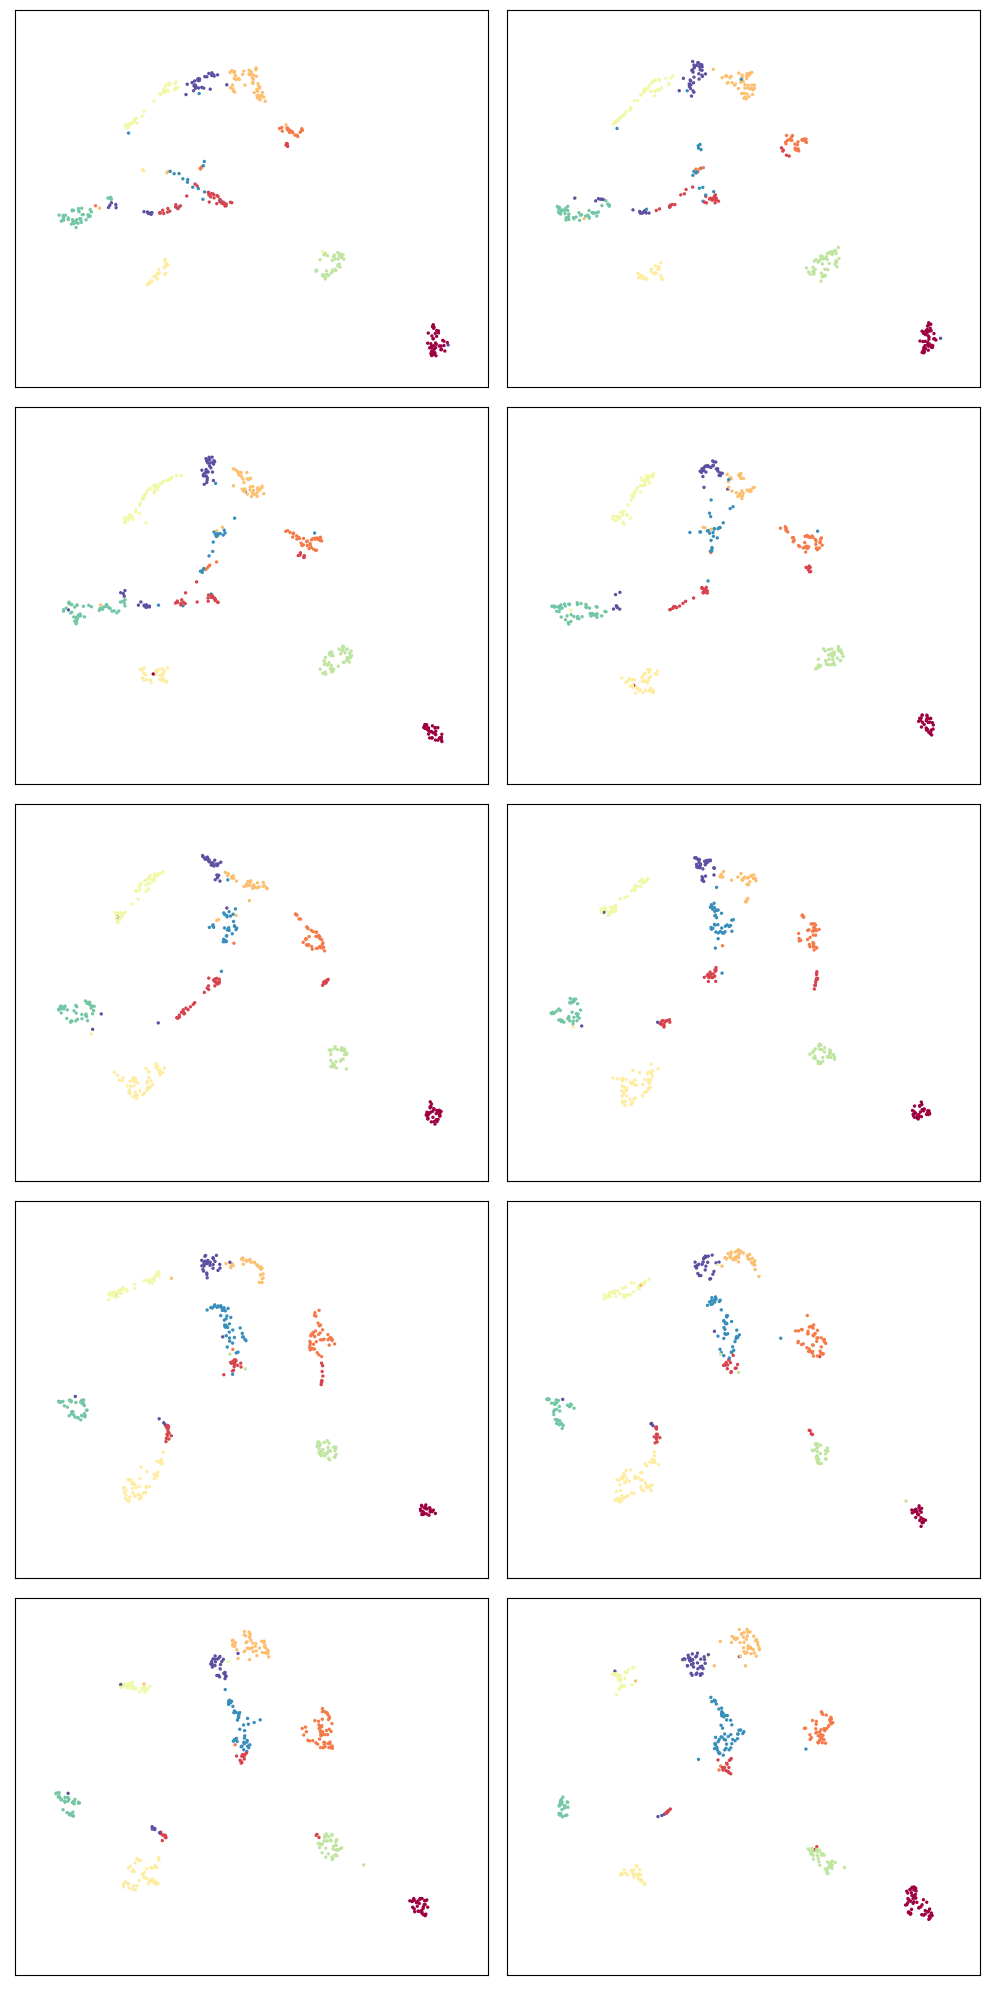

In [8]:
fig, axs = plt.subplots(5,2, figsize=(10, 20))
ax_bound = axis_bounds(np.vstack(aligned_mapper.embeddings_))
for i, ax in enumerate(axs.flatten()):
    current_target = ordered_target[150 * i:min(ordered_target.shape[0], 150 * i + 400)]
    ax.scatter(*aligned_mapper.embeddings_[i].T, s=2, c=current_target, cmap="Spectral")
    ax.axis(ax_bound)
    ax.set(xticks=[], yticks=[])
plt.tight_layout()